import library

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [49]:
df = pd.read_excel('dataset_penjualan.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID transaksi  150 non-null    object
 1   beras         150 non-null    int64 
 2   telur         150 non-null    int64 
 3   tepung        150 non-null    int64 
 4   migor         150 non-null    int64 
 5   gula          150 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.2+ KB


In [50]:
df.drop(columns=['ID transaksi'], inplace=True)
df.head()

,beras,telur,tepung,migor,gula
0,1,1,0,0,0
1,1,0,1,1,0
2,1,1,0,0,1
3,1,1,0,1,0
4,1,1,0,0,0


cek data hilang

In [51]:
missing_data = df.isnull().sum()
print('\nJumlah data yang hilang per kolom')
print(missing_data[missing_data > 0])

if df.isnull().values.any():
    print('\nAda data yang hilang')
else:
    print('\nTidak ada data yang hilang')


Jumlah data yang hilang per kolom
Series([], dtype: int64)

Tidak ada data yang hilang


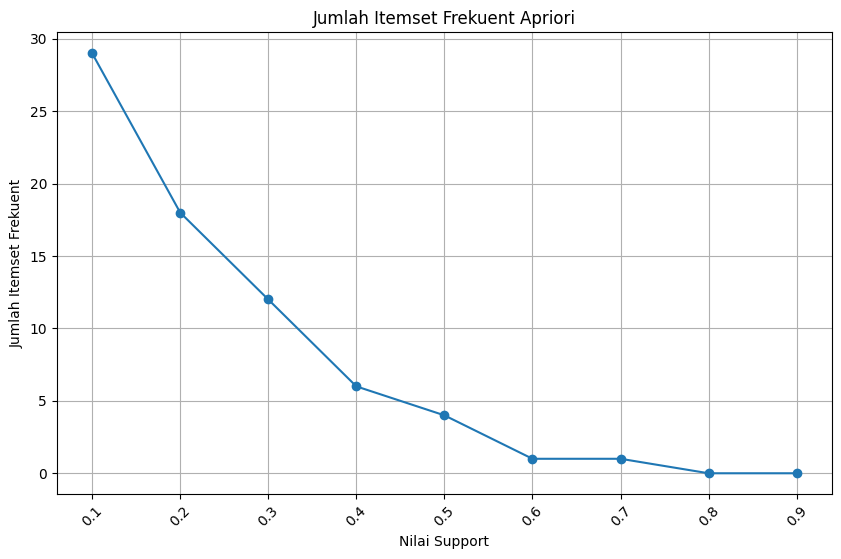

In [52]:
support_value = []
num_itemset = []

for support in range(1,10):
    support_threshold = support / 10
    frequent_itemset_apriori = apriori(df, min_support=support_threshold, use_colnames=True)
    
    support_value.append(support_threshold)
    num_itemset.append(len(frequent_itemset_apriori))

plt.figure(figsize=(10, 6))
plt.plot(support_value, num_itemset, marker='o')
plt.title('Jumlah Itemset Frekuent Apriori')
plt.xlabel('Nilai Support')
plt.ylabel('Jumlah Itemset Frekuent')
plt.grid()
plt.xticks(support_value, rotation=45)
plt.show()


implementasi algoritma apriori

In [53]:


# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Define a function to style the table
def style_table(df):
    return df.style.set_properties(**{'background-color': 'lightblue', 'color': 'black'}) \
                   .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]}]) \
                   .set_caption("Styled Table")

# Apply the style to the frequent itemsets and rules
styled_frequent_itemsets = style_table(frequent_itemsets)
styled_rules = style_table(rules)

# Display the styled tables
styled_frequent_itemsets
styled_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'telur'}),frozenset({'beras'}),0.580000,0.740000,0.446667,0.770115,1.040696,0.017467,1.131000,0.093106
1,frozenset({'beras'}),frozenset({'telur'}),0.740000,0.580000,0.446667,0.603604,1.040696,0.017467,1.059545,0.150402
2,frozenset({'tepung'}),frozenset({'beras'}),0.466667,0.740000,0.326667,0.700000,0.945946,-0.018667,0.866667,-0.096774
3,frozenset({'beras'}),frozenset({'tepung'}),0.740000,0.466667,0.326667,0.441441,0.945946,-0.018667,0.954839,-0.180180
4,frozenset({'migor'}),frozenset({'beras'}),0.546667,0.740000,0.366667,0.670732,0.906394,-0.037867,0.789630,-0.185540
5,frozenset({'beras'}),frozenset({'migor'}),0.740000,0.546667,0.366667,0.495495,0.906394,-0.037867,0.898571,-0.284284
6,frozenset({'gula'}),frozenset({'beras'}),0.566667,0.740000,0.393333,0.694118,0.937997,-0.026000,0.850000,-0.132353
7,frozenset({'beras'}),frozenset({'gula'}),0.740000,0.566667,0.393333,0.531532,0.937997,-0.026000,0.925000,-0.202703
8,frozenset({'telur'}),frozenset({'tepung'}),0.580000,0.466667,0.213333,0.367816,0.788177,-0.057333,0.843636,-0.390200
9,frozenset({'tepung'}),frozenset({'telur'}),0.466667,0.580000,0.213333,0.457143,0.788177,-0.057333,0.773684,-0.335065


C:\Users\tegar\AppData\Local\Temp\ipykernel_2116\1541081942.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets.reset_index(), palette='viridis')


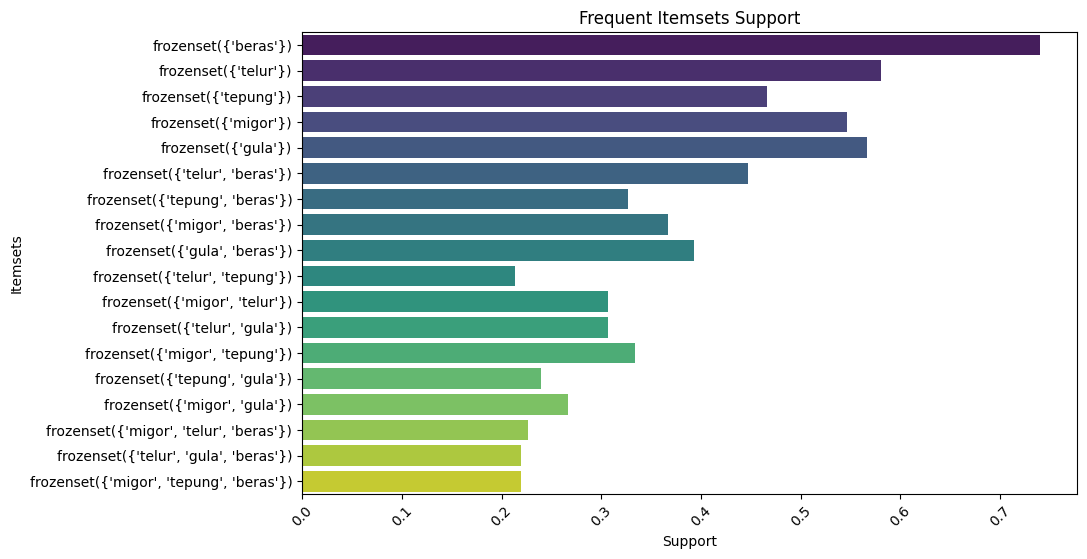

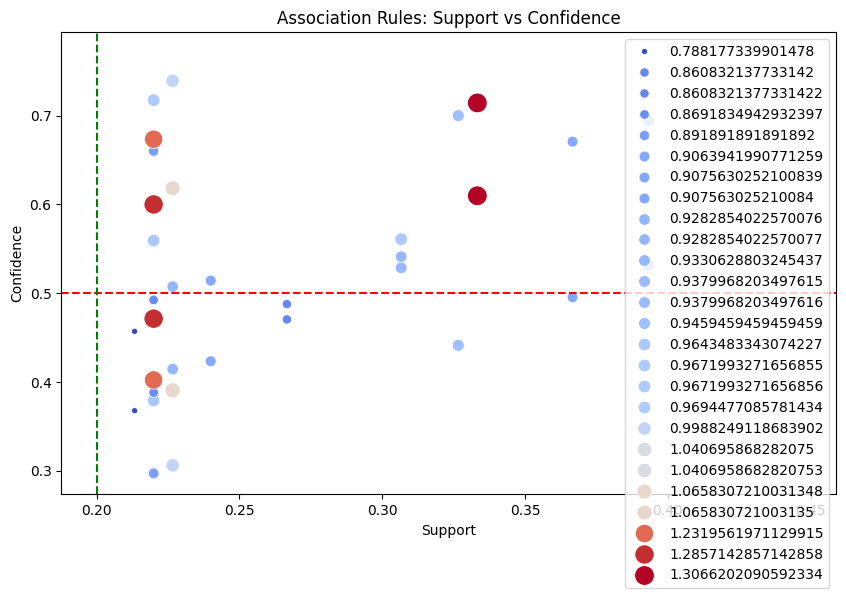

In [54]:

import seaborn as sns


# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Visualize Frequent Itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets.reset_index(), palette='viridis')
plt.title('Frequent Itemsets Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(rotation=45)
plt.show()

# Visualize Association Rules
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='coolwarm', legend='full')
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.axhline(y=0.5, color='r', linestyle='--')  # Threshold line for confidence
plt.axvline(x=0.2, color='g', linestyle='--')  # Threshold line for support
plt.legend(loc='upper right')
plt.show()

implementasi algoritma fp-growth

In [55]:


# Generate frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.7)

# Define a function to style the table
def style_table(df, title):
    return df.style.set_properties(**{'background-color': 'lightblue', 'color': 'black'}) \
                   .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]}]) \
                   .set_caption(title)

# Set float format for better display
pd.options.display.float_format = '{:.2f}'.format

# Apply the style to the frequent itemsets and rules
styled_frequent_itemsets_fp = style_table(frequent_itemsets_fp, "Frequent Itemsets (FP-Growth)")
styled_rules_fp = style_table(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']], "Association Rules (FP-Growth)")

# Display the styled tables
styled_frequent_itemsets_fp
styled_rules_fp

,antecedents,consequents,support,confidence,lift
0,frozenset({'telur'}),frozenset({'beras'}),0.446667,0.770115,1.040696
1,"frozenset({'migor', 'telur'})",frozenset({'beras'}),0.226667,0.739130,0.998825
2,frozenset({'tepung'}),frozenset({'migor'}),0.333333,0.714286,1.306620
3,frozenset({'tepung'}),frozenset({'beras'}),0.326667,0.700000,0.945946
4,"frozenset({'telur', 'gula'})",frozenset({'beras'}),0.220000,0.717391,0.969448


C:\Users\tegar\AppData\Local\Temp\ipykernel_2116\3913241715.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets_fp.sort_values('support', ascending=False).head(10), palette='viridis')


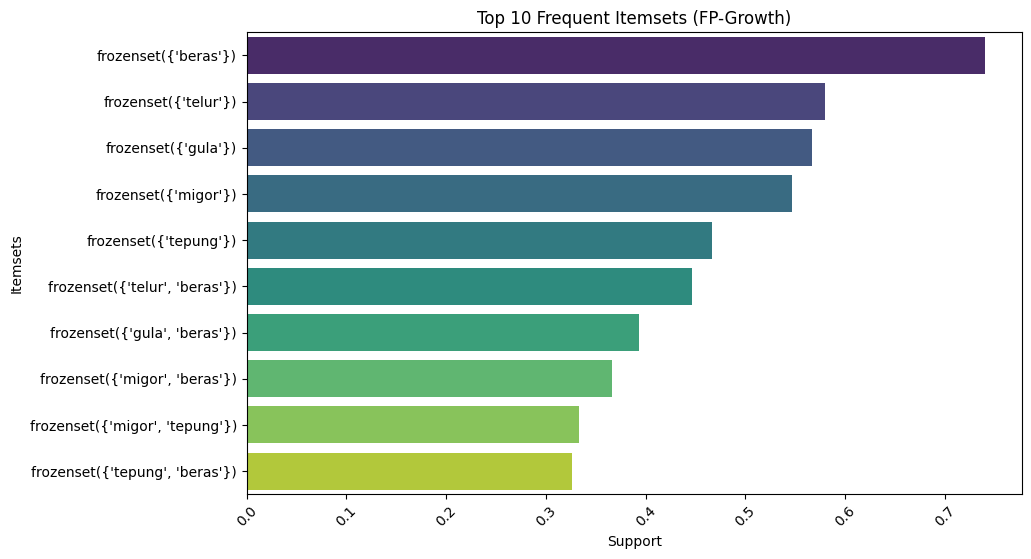

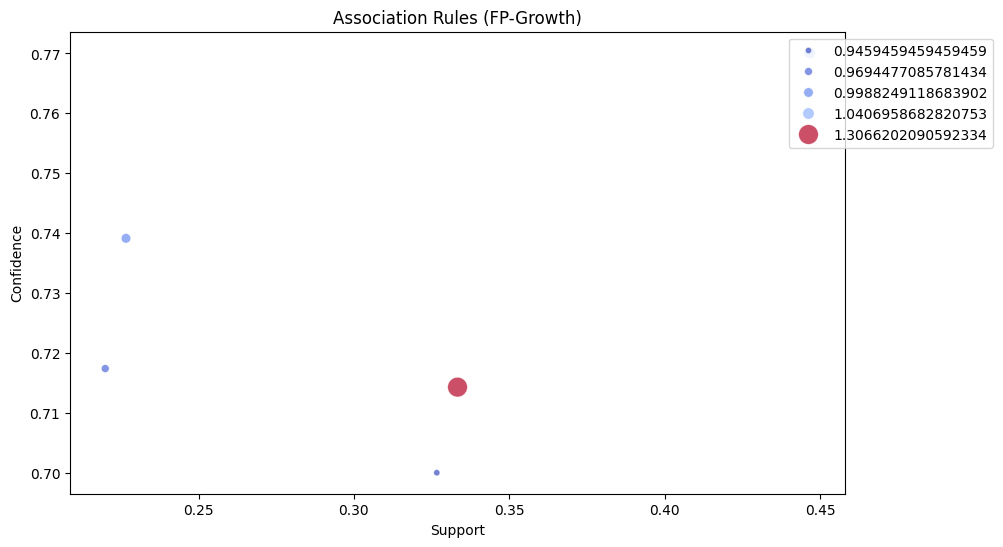

In [56]:

# Generate frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.7)

# Define a function to style the table
def style_table(df, title):
    return df.style.set_properties(**{'background-color': 'lightblue', 'color': 'black'}) \
                   .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]}]) \
                   .set_caption(title)

# Set float format for better display
pd.options.display.float_format = '{:.2f}'.format

# Apply the style to the frequent itemsets and rules
styled_frequent_itemsets_fp = style_table(frequent_itemsets_fp, "Frequent Itemsets (FP-Growth)")
styled_rules_fp = style_table(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']], "Association Rules (FP-Growth)")

# Display the styled tables
styled_frequent_itemsets_fp
styled_rules_fp

# Plotting Frequent Itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_fp.sort_values('support', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Frequent Itemsets (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(rotation=45)
plt.show()

# Plotting Association Rules
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules_fp, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='coolwarm', alpha=0.7)
plt.title('Association Rules (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

C:\Users\tegar\AppData\Local\Temp\ipykernel_2116\3669725230.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values('support', ascending=False).head(10), palette='viridis')
C:\Users\tegar\AppData\Local\Temp\ipykernel_2116\3669725230.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets_fp.sort_values('support', ascending=False).head(10), palette='viridis')


Text(0, 0.5, 'Itemsets')

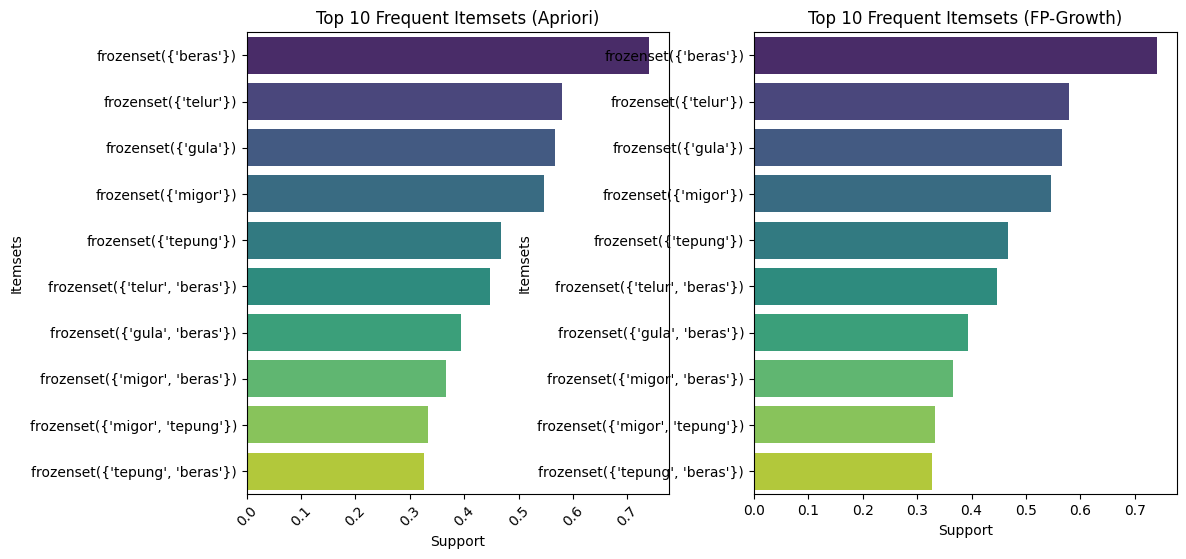

In [57]:


# Generate frequent itemsets using Apriori
frequent_itemsets_apriori = apriori(df, min_support=0.2, use_colnames=True)

# Generate frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(df, min_support=0.2, use_colnames=True)

# Plotting Frequent Itemsets Comparison
plt.figure(figsize=(12, 6))

# Plot for Apriori
plt.subplot(1, 2, 1)
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values('support', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Frequent Itemsets (Apriori)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(rotation=45)

# Plot for FP-Growth
plt.subplot(1, 2, 2)
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_fp.sort_values('support', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Frequent Itemsets (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Itemsets')

C:\Users\tegar\AppData\Local\Temp\ipykernel_2116\907146450.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values('support', ascending=False).head(15), palette='Blues_d')
C:\Users\tegar\AppData\Local\Temp\ipykernel_2116\907146450.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets_fp.sort_values('support', ascending=False).head(15), palette='Oranges_d')


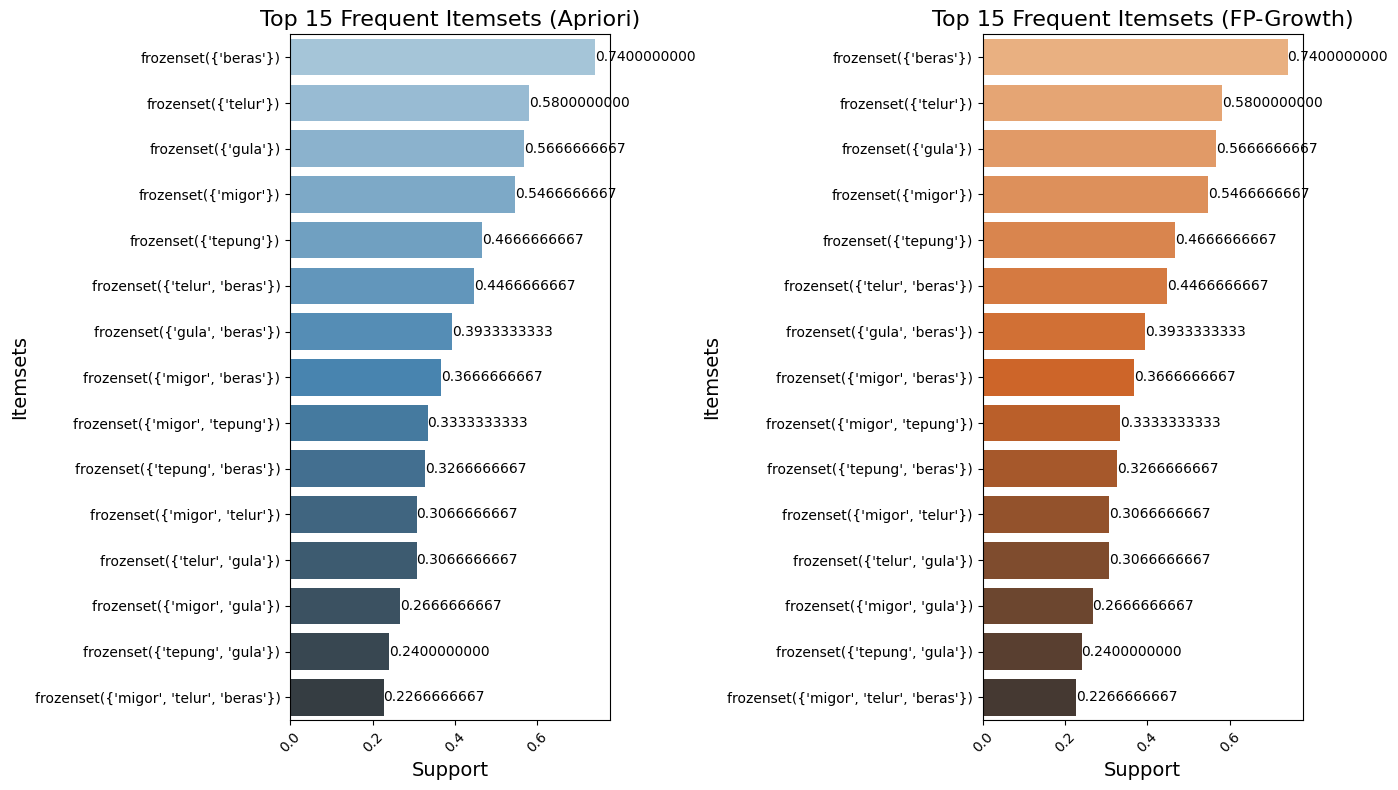

In [58]:


# Generate frequent itemsets using Apriori
frequent_itemsets_apriori = apriori(df, min_support=0.2, use_colnames=True)

# Generate frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(df, min_support=0.2, use_colnames=True)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot for Apriori
plt.subplot(1, 2, 1)
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values('support', ascending=False).head(15), palette='Blues_d')
plt.title('Top 15 Frequent Itemsets (Apriori)', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Itemsets', fontsize=14)
plt.xticks(rotation=45)
for index, value in enumerate(frequent_itemsets_apriori.sort_values('support', ascending=False).head(15)['support']):
    plt.text(value, index, f'{value:.10f}', color='black', ha="left", va="center")

# Plot for FP-Growth
plt.subplot(1, 2, 2)
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_fp.sort_values('support', ascending=False).head(15), palette='Oranges_d')
plt.title('Top 15 Frequent Itemsets (FP-Growth)', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Itemsets', fontsize=14)
plt.xticks(rotation=45)
for index, value in enumerate(frequent_itemsets_fp.sort_values('support', ascending=False).head(15)['support']):
    plt.text(value, index, f'{value:.10f}', color='black', ha="left", va="center")

# Adjust layout
plt.tight_layout()
plt.show()

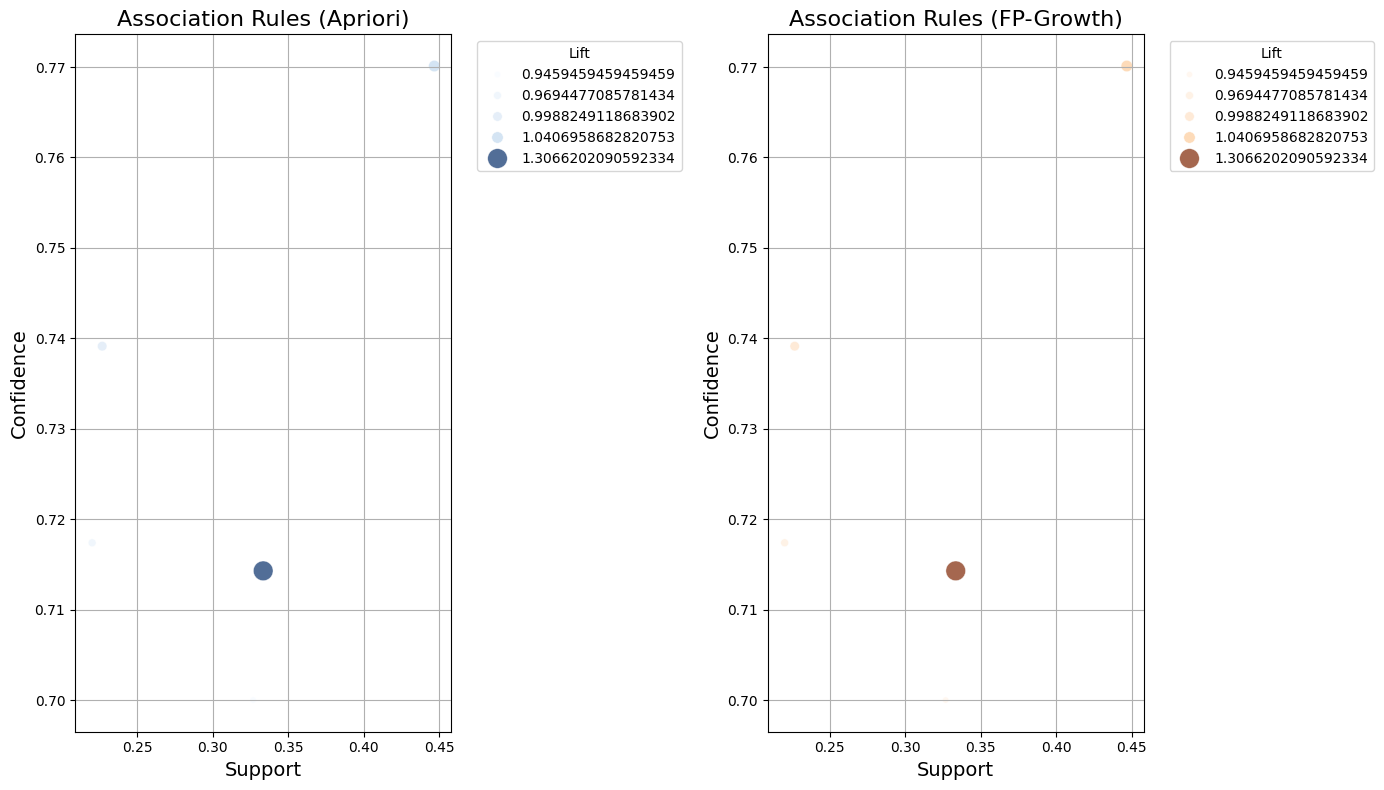

In [59]:


# Generate frequent itemsets using Apriori
frequent_itemsets_apriori = apriori(df, min_support=0.2, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.7)

# Generate frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(df, min_support=0.2, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.7)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot untuk Apriori
plt.subplot(1, 2, 1)
sns.scatterplot(data=rules_apriori, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='Blues', alpha=0.7)
plt.title('Association Rules (Apriori)', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Confidence', fontsize=14)
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Plot untuk FP-Growth
plt.subplot(1, 2, 2)
sns.scatterplot(data=rules_fp, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='Oranges', alpha=0.7)
plt.title('Association Rules (FP-Growth)', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Confidence', fontsize=14)
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()